In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [132]:
def multbars(x, y):
    initial_dataframe = pd.DataFrame({x.name: x, y.name: y})
    result_dataframe = {}
    
    for index in y.value_counts().index:
        result_dataframe[index] = []

    for index in x.value_counts().index:
        values = initial_dataframe.loc[initial_dataframe[x.name] == index][y.name].value_counts()
        
        for key in result_dataframe:
            if key not in values.index:
                values[key] = 0

        for index in values.index:
            result_dataframe[index].append(values[index])
    
    result_dataframe[x.name] = x.value_counts().index
    return pd.DataFrame(result_dataframe)

### DateCategorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 30/10/2016 to 09/04/2017.

Variável categórica de Data que nos diz a data das transações no formato (AAAA-MM-DD). A coluna inclui datas de 30/10/2016 até 09/04/2017.

### TimeCategorical variable that tells us the time of the transactions (HH:MM:SS format).

Variável categórica de Hora que nos diz a hora das transações.

### TransactionQuantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction, that's why the data set has less transactions than observations.

Variável quantitativa de Transação que nos permite diferenciar as transações. As linhas que compartilham o mesmo valor neste campo pertencem a mesma transação, é por isso que o dataset tem menos transações do que observações.

### ItemCategorical variable with the products.

Variável categórica de Item com os produtos.

In [133]:
dataset = pd.read_csv('BreadBasket_DMS.csv')

In [134]:
dataset.tail()

,Date,Time,Transaction,Item
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [135]:
dataset.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [189]:
print(len(dataset['Date'].unique()))
dataset['Date'].unique()

159


array(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02',
       '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06',
       '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
       '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
       '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
       '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22',
       '2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
       '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
       '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
       '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
       '2016-12-09', '2016-12-10', '2016-12-11', '2016-12-12',
       '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
       '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
       '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
       '2016-12-31', '2017-01-01', '2017-01-03', '2017-

In [178]:
data = pd.DataFrame()

In [179]:
date = []

for i in dataset['Date'].unique():
    date.append(i)
    
data['Date'] = pd.Series(date)

In [180]:
data

,Date
0,2016-10-30
1,2016-10-31
2,2016-11-01
3,2016-11-02
4,2016-11-03
5,2016-11-04
6,2016-11-05
7,2016-11-06
8,2016-11-07
9,2016-11-08


In [190]:
number_of_transactions = []

for date in data['Date']:
    transactions = len(dataset.loc[dataset['Date'] == date]['Transaction'].unique())
    number_of_transactions.append(transactions)
    
data['Number of Transactions'] = pd.Series(number_of_transactions)

In [192]:
data

,Date,Number of Transactions
0,2016-10-30,79
1,2016-10-31,96
2,2016-11-01,77
3,2016-11-02,83
4,2016-11-03,95
5,2016-11-04,85
6,2016-11-05,119
7,2016-11-06,87
8,2016-11-07,75
9,2016-11-08,72


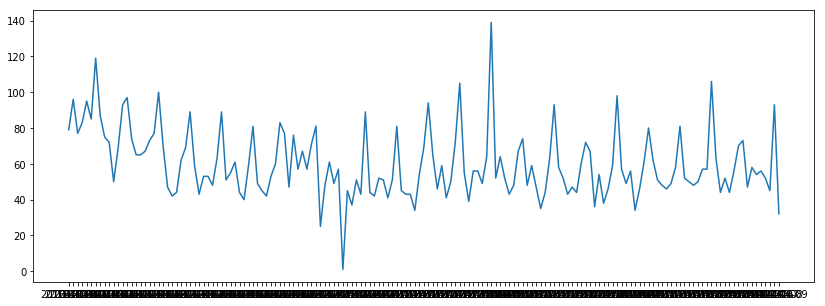

In [194]:
plt.figure(1, figsize=(14, 5))
plt.plot(data['Date'], data['Number of Transactions'])